# Tellende prosjekt i ISTx1003 - 2021

I prosjektdelen av ISTx1003 Statistikk, Statistisk læring og data science, har vi fokus på tre hovedtemaer: 
regresjon, klassifikasjon og klyngeanalyse. 

Dette er oppgaveteksten til den tellende prosjektoppgaven, der besvarelsen teller 30% av karakteren i emnet.  

Veiledning av prosjektoppgaven annonseres separat for hver campus i Blackboard.

Oppgaven utføres i grupper, med anbefalt gruppestørrelse 2-4 personer. **Det er opprettet gruppesett under "Prosjektoppgaven" på Blackboard**, der dere melder dere på. 

Informasjon om Prosjektmodulen finnes i Blackboard.  

Det er totalt xy spørsmålspunkter som skal besvares, og hvert spørsmålspunkt gir maksimalt ett poeng. Alle spørsmålene er skrevet inn i en tekstfil som skal brukes som mal for det som skal leveres inn. Tekstfilen ligger her: https://www.math.ntnu.no/emner/IST100x/ISTx1003/Prosjekt1003Qs.txt
(Det er to grunner til å bruke denne malen: det letter samskriving og det letter karaktersetting.)

Oppgaven skal utføres i Python, ved hjelp av Jupyter-notatbok-versjonen av denne filen som du nå leser. Notatboken er lastet opp på Jupyterhubben (todo), men kan også finnes her: https://wiki.math.ntnu.no/istx1003/2021h/start


Det er meningen at dere skal kjøre notatboken på Jupyterhubben vår https://s.ntnu.no/isthub, eller på deres egen installasjon.

Innlevering av prosjektet skal skje som en innlevering på Blackboard, og kun en i hver gruppe leverer.

**Følgende skal leveres inn (lastes opp på Blackboard):**

* Svarene på spørsmålene som dere har skrevet inn i spørsmålsmalen og laget om til en pdf-fil (for eksempel om dere har gjor om malen til en word-fil og så lagret den som pdf).
* Denne Jupyter-notatboken, der de endringene dere har gjort i koden er med.

**Frist for innlevering av prosjektet er mandag 29.november kl 23.59.** (to adjust)

# Oppgave 1: Regresjon

Vi bruker en dataeksempel fra... som dataingeniør vil du antakeligvis jobbe med mange forskjellige type medarbeider, som for eksempel forsker, i finanssektoren, teknologigrupper etc.
 

**Oppgaven inneholder følgende elementer:**

* Laste inn og utforske et datasett
* Tilpasse en enkel lineær regresjonsmodell og diskutere denne
* Tilpasse en multippel lineær regresjonsmodell og diskutere denne

## Totale kostnader for pasienter inlagit i Amerikanske sykehuser (1989-1991)

* `totcst`: totale kostnader 
* `age`: alder
* `dzgroup`: sykdomsgruppe
* `num.co`: antall komorbiditeter (hvor mange sykdommer noen har)
* `edu`: antall år med utdanning
* `income`: inntektet (kategorisert) 
* `scoma`: et mål for Glasgow-Koma verdi
* `meanbp`: gjennomsnittig blodtrykk
* `hrt`: puls
* `resp`: respirasjonsfrekvens
* `temp`: kroppstemperatur
* `race`: etnisitet
* `pafi`: forhold av PaO2/FiO2 (blod/gas blanding)

In [1]:
# importere pakker og funksjoner vi trenger i oppgave 1

# generelt - numerikk og nyttige funksjoner
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Fordelinger, modeller for regresjon, qq-plott 
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as  sm

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
InteractiveShell.ast_node_interactivity = "last_expr"

## Datasettet

Vi leser inn data og skriver ut de første og siste observasjonene i datasettet, og så sjekkes datatyper og noen typer konverteres til type *category*.

In [3]:
# Lese inn datasettet ved funksjon fra pandas  (df=data frame - vanlig navn å gi et datasett)
df = pd.read_csv("~/Teaching/ISTT1003/2021/Prosjekt2021/data/support.csv", sep = ',')

# Skriv ut de første og siste radene
print(df)

        age            dzgroup  num.co   edu      income  scoma     totcst  \
0     43.54  ARF/MOSF w/Sepsis       1   NaN         NaN     26  390460.50   
1     63.66  ARF/MOSF w/Sepsis       0  22.0    $25-$50k     26  156674.13   
2     31.84          Cirrhosis       2  16.0  under $11k      0   17528.44   
3     48.70        Lung Cancer       0  16.0         NaN      0   33002.50   
4     49.61  ARF/MOSF w/Sepsis       1  12.0    $25-$50k      0  288592.25   
...     ...                ...     ...   ...         ...    ...        ...   
8193  68.62               COPD       2  12.0  under $11k      0    1847.38   
8194  66.07  ARF/MOSF w/Sepsis       1   8.0         NaN      0   34329.31   
8195  55.15               Coma       1  11.0         NaN     41   23558.50   
8196  70.38  ARF/MOSF w/Sepsis       1   NaN         NaN      0   31409.02   
8197  81.54  ARF/MOSF w/Sepsis       1   8.0    $11-$25k      0   10605.76   

       race  meanbp    hrt  resp   temp    pafi  
0     white  

In [16]:
# Konverter kjønn og idrettsgren til kategory
df=df.astype({'dzgroup':'category','race':'category','income':'category'})
#print(df["Kjoenn"].value_counts())
#print(df["Sport"].value_counts())

In [17]:
df.describe()

,age,num.co,edu,scoma,totcst,meanbp,hrt,resp,temp,pafi
count,8198.000000,8198.000000,6720.000000,8198.000000,8198.000000,8198.000000,8198.000000,8198.000000,8198.000000,6098.000000
mean,62.996886,1.900098,11.762946,11.910710,30897.295055,84.212247,97.138778,23.421078,37.101069,240.243429
std,15.545520,1.351091,3.430933,24.629396,45809.770034,27.490486,31.439296,9.563937,1.248080,110.653084
min,18.120000,0.000000,0.000000,0.000000,420.310000,0.000000,0.000000,0.000000,31.700000,12.000000
25%,53.195000,1.000000,10.000000,0.000000,5980.725000,63.000000,72.000000,18.000000,36.200000,155.000000
50%,65.115000,2.000000,12.000000,0.000000,14492.600000,77.000000,100.000000,24.000000,36.700000,225.000000
75%,74.397500,3.000000,14.000000,9.000000,36146.585000,107.000000,120.000000,28.000000,38.090000,306.000000
max,101.850000,9.000000,31.000000,100.000000,633212.000000,195.000000,300.000000,90.000000,41.700000,890.380000


In [18]:
df.dtypes

age         float64
dzgroup    category
num.co        int64
edu         float64
income     category
scoma         int64
totcst      float64
race       category
meanbp        int64
hrt         float64
resp          int64
temp        float64
pafi        float64
dtype: object

Her ser vi alle kontinuerlige variabler, mens dzgroup, income og race er kategoriske, og de må vi kode om med såkalt dummy-variabelkoding for å bli behandlet riktig i regresjonsanalysen.

## Enkel lineær  regresjon 

Nå skal vi se på de totale kostnader `totcst` som responsen vi ønsker å undersøke/forklare, og vi skal starte med å bare se på 
variablen 'age' som eneste forklaringsvariabel. Følgende er et kryssplott av 'totcst' mot 'age':

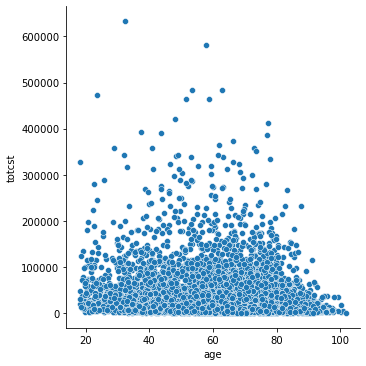

In [19]:
sns.relplot(x = 'age', y = 'totcst', kind = 'scatter', data = df)
plt.show()

### **Problem 1a)** (1P) 
Vil du konkludere med at en lineær regressjonsmodell passer bra? Hvorfor (ikke)?

I en tilfelle som her er det ofte lurt å transformere én eller flere variabler. Som statistiker vet vi at en logaritmisk transformasjon ofte hjelper. Det gjør vi nå:

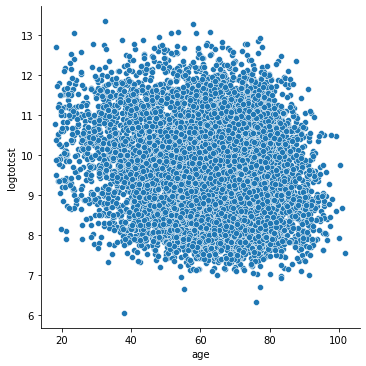

In [32]:
# Vi lager en ny variabel som er log(totcst):
df['logtotcst'] = np.log(df['totcst'])
sns.relplot(x = 'age', y = 'logtotcst', kind = 'scatter', data = df)
plt.show()

### **Problem 1b)** (1P) 
Sammenlign den nye grafen (med log(totcost) som respons) med den gamle grafen lengre opp. Har du tro på at en lineær regresjonsmodell passer nå?

Uavhengig av hva du svarte under b) skal vi nå tilpasse en enkel lineær modell med 'logtotcst' som respons og 'age' som forklaringsvariabel. For å oppsummere det vi har snakket om i undervisningen, så består det å utføre en (enkel og multippel) lineær regresjonsanalyse av følgende steg:
    
* Steg 1: Bli kjent med dataaene ved å se på oppsummeringsmål og ulike typer plott
* Steg 2: Spesifiser en matematisk modell (med modellformel)
* Steg 3: Initialiser og tilpass modellen
* Steg 4: Presenter resultater fra den tilpassede modellen 
* Steg 5: Evaluer om modellen passer til dataene

Vi har nå gjort Steg 1, og under finner du kode for å gjøre steg 2-4. Studér og kjør koden.

In [26]:
# kodechunk Steg2-4

# Steg 2: spesifiser matematisk modell
formel='logtotcst ~ age'

# Steg 3: Initaliser og tilpass en enkel lineær regresjonsmodell
# først initialisere
modell = smf.ols(formel,data=df)
# deretter tilpasse
resultat = modell.fit()

# Steg 4: Presenter resultater fra den tilpassede regresjonsmodellen
print(resultat.summary())

                            OLS Regression Results                            
Dep. Variable:              logtotcst   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     274.1
Date:                Tue, 14 Sep 2021   Prob (F-statistic):           1.40e-60
Time:                        13:48:57   Log-Likelihood:                -12917.
No. Observations:                8198   AIC:                         2.584e+04
Df Residuals:                    8196   BIC:                         2.585e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.4941      0.054    194.583      0.0

Nå skal vi studere resultatene i *resultat.summary()*, og vi refererer til *øvre panel* som linjene mellom første og andre doble strek ==== (dette er delen som starter med Dep.Variable), *midtre panel*, og *nedre panel* (som starter med Omnibus). Vi ser først på **midtre** panel.

### **Problem 1c)** (2P) 

   (i) Skriv ned ligningen for den estimerte regresjonsmodellen.

   (ii) Hvordan vil du tolke den estimerte verdien til skjæringpunktet (Intercept) $\hat{\beta}_0$?
   
   (iii) Rapporter $R^2_{adj}$ og gi en tolking for verdien (er den stor/liten, hva betyr det her?)

<AxesSubplot:xlabel='age', ylabel='logtotcst'>

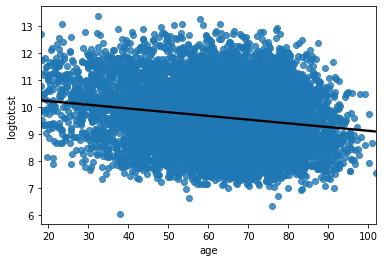

In [31]:
sns.regplot(x=df['age'],y=df['logtotcst'],line_kws={"color": "black"})

### **Problem 1d)** (3P)

 (i) Vi ser at for 'age' er 'coef' lik -0.0138 (detter er $\hat\beta_1$). Tolk dette tallet til en ansatte i sykehuset som ikke har hørt om enkel lineær regresjon.

 (ii) Hva er 95% konfidensintervallen for $\hat\beta_{1}$, og hva betyr det?

 (iii) Hva er $p$-verdien for $\hat\beta_{1}$? Forklar om vi kan være sikkert for at alderen har en korrelasjon med 'logtotcost'. Hvorfor (ikke)? 


### **Problem 1e)** (xP)



## Multippel lineær regresjon

# Oppgave 2: Klassifikasjon

* Eksempel fra kiran med face recognition? 
* Email spam/ham eksempel? Check here: 
    * https://www.kdnuggets.com/2017/03/email-spam-filtering-an-implementation-with-python-and-scikit-learn.html, 
    * or here: https://towardsdatascience.com/spam-detection-with-logistic-regression-23e3709e522


## 2a) Lese inn og preprosessere data

## 2b) Logistisk regresjon

## 2c) $k$-nærmeste-nabo-klassifikasjon


## 2d) Evaluere beste modeller


# Oppgave 3: Klyngeanalyse

 

## Hvorfor klyngeanalyse på ...?

 

## 3a) Lese inn og preprosessere bildet

## 3c) Klyngeanalyse med $K$-gjennomsnitt

## 3d) Hierarkisk klyngeanalyse